In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#获取数据
split_index = 16000
df_day1 = pd.read_csv('day1.csv')
df_day2 = pd.read_csv('day2.csv')
df_day3 = pd.read_csv('day3.csv')

In [3]:
def groupby_time(df):
    grouped_time = df.groupby('time')
    data = []
    for key, group in grouped_time:
        floor1 = group[group.sid < split_index]
        floor2 = group[group.sid > split_index]
        d = {
            'time': int(key),
            'all_people': group.shape[0],
            'floor1_people': floor1.shape[0],
            'floor2_people': floor2.shape[0],
            'all_sensor': len(group.groupby('sid')),
            'floor1_sensor': len(floor1.groupby('sid')),
            'floor2_sensor': len(floor2.groupby('sid')),
        }
        data.append(d)
    df_groupby_time = pd.DataFrame(data)
    df_groupby_time = df_groupby_time.set_index('time')
    return df_groupby_time

def groupby_id(df):
    grouped_id = df.groupby('id')
    data = []
    for key, group in grouped_id:
        floor1 = group[group.sid < split_index]
        floor2 = group[group.sid > split_index]
        d = {
            'id': int(key),
            'floor1_cnt': floor1.shape[0],
            'floor2_cnt': floor2.shape[0],
            'all_cnt': group.shape[0],
            'floor1_time':time(floor1),
            'floor2_time':time(floor2),
            'all_time':time(group)
        }
        data.append(d)
    df_people = pd.DataFrame(data)
    df_people = df_people.set_index('id')
    return df_people

def time(group):
    max = group['time'].max()
    min = group['time'].min()
    return max - min

In [91]:
def lines_chart(df, keys, title='line', ylabel='cnt'):
    df[keys].plot()
    plt.title(title)
    plt.ylabel(ylabel)
    img_name = 'img/line/' + title + '_' + keys[0].split('_')[1]+'.png'
    plt.savefig(img_name)
    plt.show()

def scatter_chart(df, x, y, title='scatter', s=1):
    df.plot(kind='scatter', x=x, y=y, s=s)
    plt.title(title)
    img_name = 'img/scatter/' + title + '_'.join([x,y])+'.png'
    plt.savefig(img_name)
    plt.show()
            
def area_chart(df, keys, sort_key, title):
    df = df.sort_values(by=sort_key).copy()
    df.index = list(range(df.shape[0]))
    df[keys].plot(kind='area')
    plt.title(title)
    img_name = 'img/area/' + title + '_' + keys[0].split('_')[1]+'.png'
    plt.savefig(img_name)
    plt.show()

def boxplot(df, keys, title):
    df[keys].boxplot()
    plt.title(title)
    img_name = 'img/boxplot/' + title + '_' + keys[0].split('_')[1]+'.png'
    plt.savefig(img_name)
    plt.show()
    
def hist_chart(df, keys, title):
    df[keys].hist()
    img_name = 'img/hist/' + title + '_' + keys[0].split('_')[1]+'.png'
    plt.savefig(img_name)
    plt.show()

In [5]:
df_day1_bytime = groupby_time(df_day1)
df_day2_bytime = groupby_time(df_day2)
df_day3_bytime = groupby_time(df_day3)

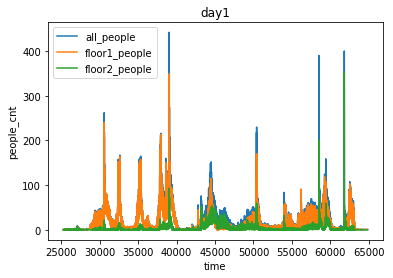

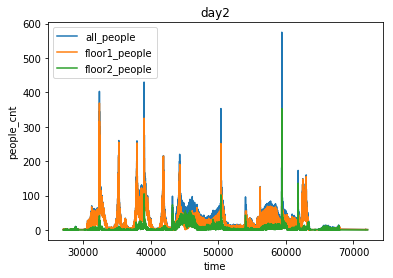

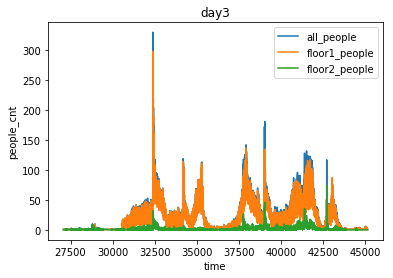

In [79]:
# 参观人总数随着时间的变化
lines_chart(df_day1_bytime, ['all_people', 'floor1_people', 'floor2_people'], 'day1', 'people_cnt')
lines_chart(df_day2_bytime, ['all_people', 'floor1_people', 'floor2_people'], 'day2', 'people_cnt')
lines_chart(df_day3_bytime, ['all_people', 'floor1_people', 'floor2_people'], 'day3', 'people_cnt')

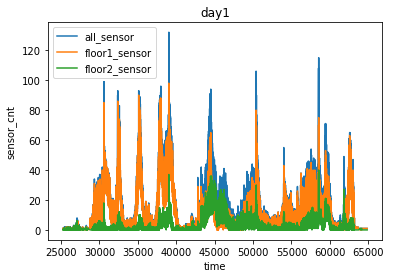

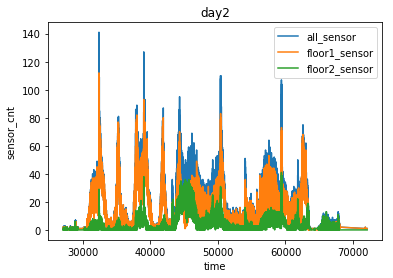

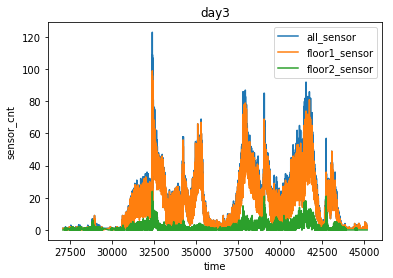

In [78]:
# 参观人的分布面积
lines_chart(df_day1_bytime, ['all_sensor', 'floor1_sensor', 'floor2_sensor'], 'day1', 'sensor_cnt')
lines_chart(df_day2_bytime, ['all_sensor', 'floor1_sensor', 'floor2_sensor'], 'day2', 'sensor_cnt')
lines_chart(df_day3_bytime, ['all_sensor', 'floor1_sensor', 'floor2_sensor'], 'day3', 'sensor_cnt')

In [13]:
df_day1_byid = groupby_id(df_day1)
df_day2_byid = groupby_id(df_day2)
df_day3_byid = groupby_id(df_day3)

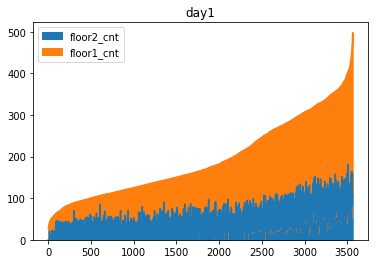

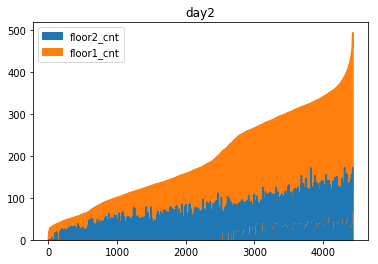

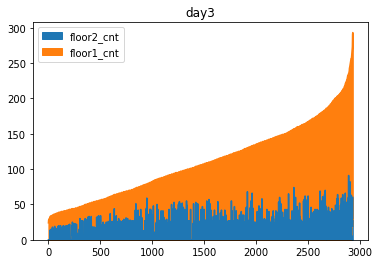

In [80]:
# 每个人的移动次数
area_chart(df_day1_byid, ['floor2_cnt', 'floor1_cnt'], 'all_cnt', 'day1')
area_chart(df_day2_byid, ['floor2_cnt', 'floor1_cnt'], 'all_cnt', 'day2')
area_chart(df_day3_byid, ['floor2_cnt', 'floor1_cnt'], 'all_cnt', 'day3')

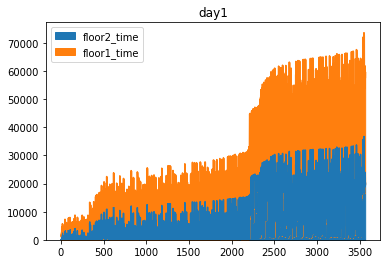

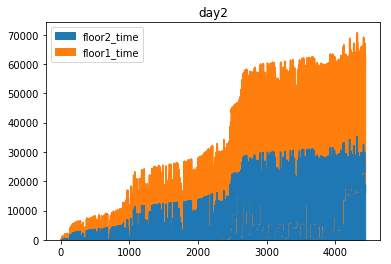

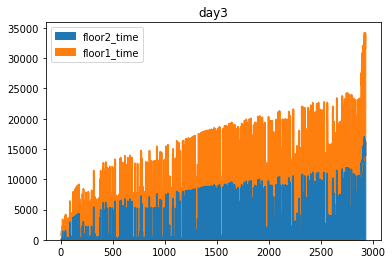

In [81]:
# 每个人的一共的时间
area_chart(df_day1_byid, ['floor2_time', 'floor1_time'], 'all_time', 'day1')
area_chart(df_day2_byid, ['floor2_time', 'floor1_time'], 'all_time', 'day2')
area_chart(df_day3_byid, ['floor2_time', 'floor1_time'], 'all_time', 'day3')

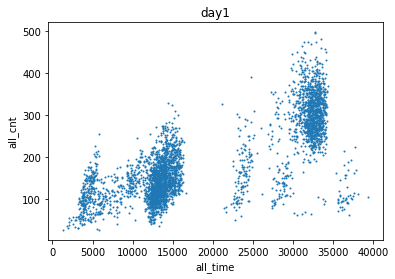

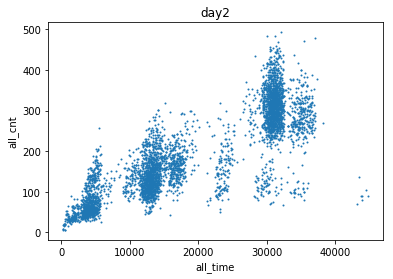

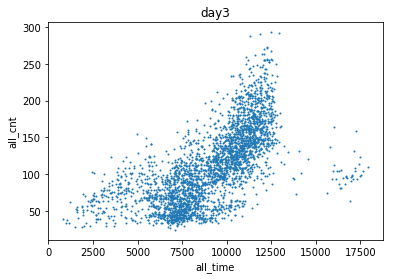

In [92]:
# 总时间和总的移动次数
scatter_chart(df_day1_byid, 'all_time', 'all_cnt', 'day1')
scatter_chart(df_day2_byid, 'all_time', 'all_cnt', 'day2')
scatter_chart(df_day3_byid, 'all_time', 'all_cnt', 'day3')

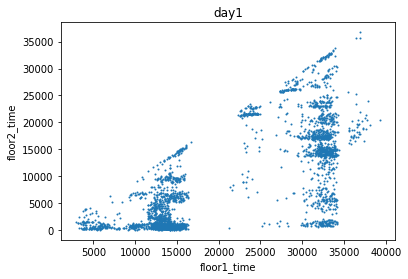

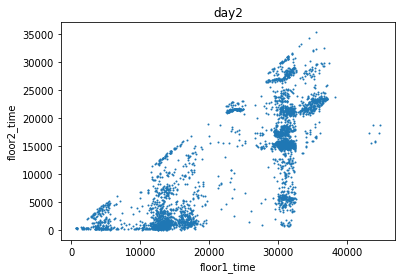

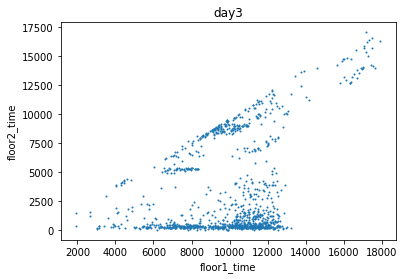

In [93]:
# 第一层停留时间和第二层停留时间关系
scatter_chart(df_day1_byid, 'floor1_time', 'floor2_time', 'day1')
scatter_chart(df_day2_byid, 'floor1_time', 'floor2_time', 'day2')
scatter_chart(df_day3_byid, 'floor1_time', 'floor2_time', 'day3')

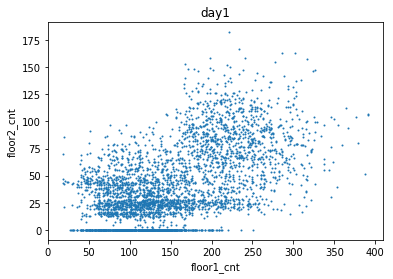

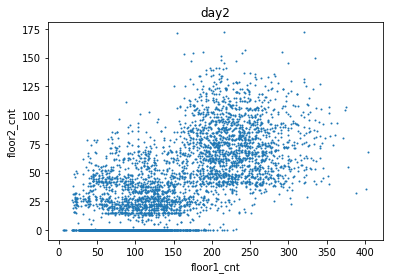

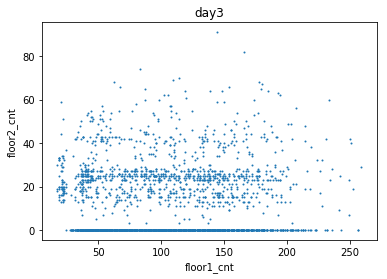

In [94]:
# 第一层停留时间和第二层的移动次数关系
scatter_chart(df_day1_byid, 'floor1_cnt', 'floor2_cnt', 'day1')
scatter_chart(df_day2_byid, 'floor1_cnt', 'floor2_cnt', 'day2')
scatter_chart(df_day3_byid, 'floor1_cnt', 'floor2_cnt', 'day3')

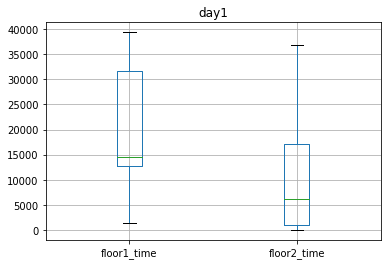

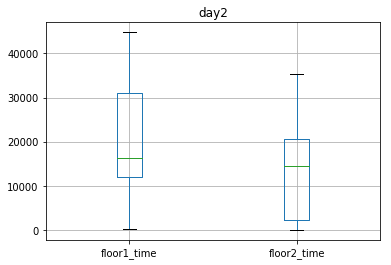

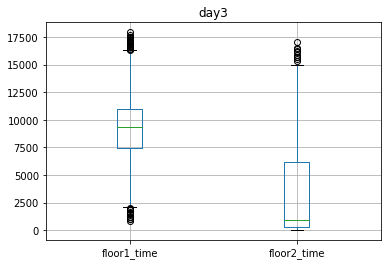

In [85]:
# 时间的分布
boxplot(df_day1_byid, ['floor1_time', 'floor2_time'], 'day1')
boxplot(df_day2_byid, ['floor1_time', 'floor2_time'], 'day2')
boxplot(df_day3_byid, ['floor1_time', 'floor2_time'], 'day3')

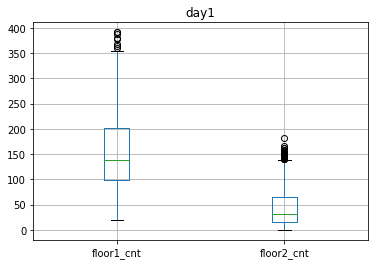

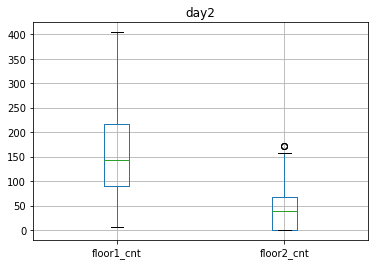

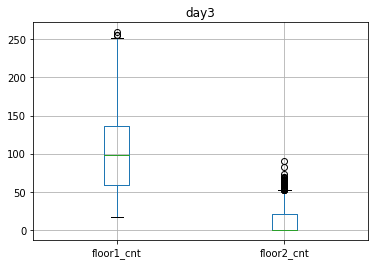

In [86]:
# 移动次数
boxplot(df_day1_byid, ['floor1_cnt', 'floor2_cnt'], 'day1')
boxplot(df_day2_byid, ['floor1_cnt', 'floor2_cnt'], 'day2')
boxplot(df_day3_byid, ['floor1_cnt', 'floor2_cnt'], 'day3')

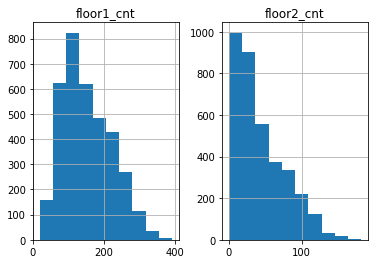

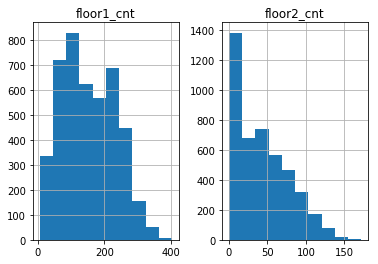

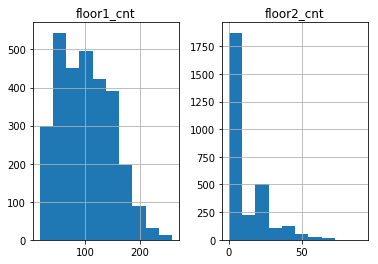

In [87]:
hist_chart(df_day1_byid, ['floor1_cnt', 'floor2_cnt'], 'day1')
hist_chart(df_day2_byid, ['floor1_cnt', 'floor2_cnt'], 'day2')
hist_chart(df_day3_byid, ['floor1_cnt', 'floor2_cnt'], 'day3')

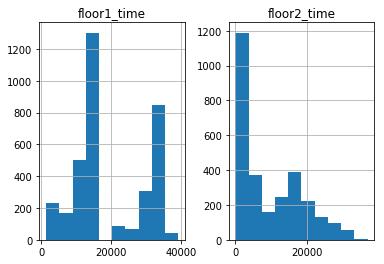

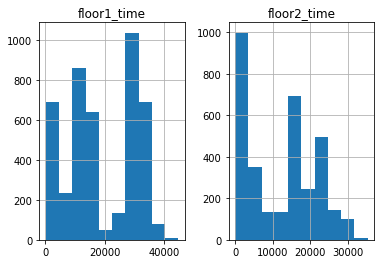

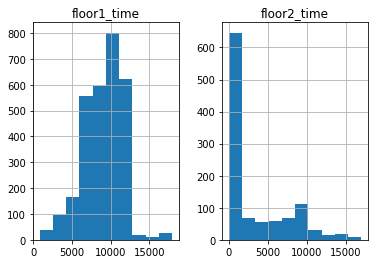

In [88]:
hist_chart(df_day1_byid, ['floor1_time', 'floor2_time'], 'day1')
hist_chart(df_day2_byid, ['floor1_time', 'floor2_time'], 'day2')
hist_chart(df_day3_byid, ['floor1_time', 'floor2_time'], 'day3')

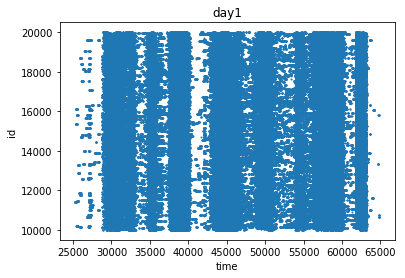

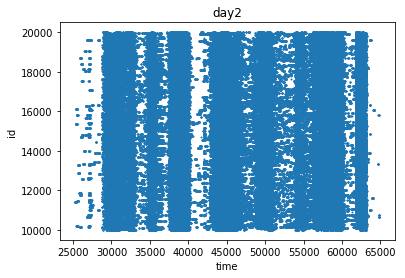

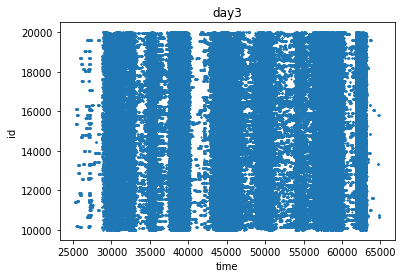

In [95]:
scatter_chart(df_day1, 'time', 'id', 'day1')
scatter_chart(df_day1, 'time', 'id', 'day2')
scatter_chart(df_day1, 'time', 'id', 'day3')

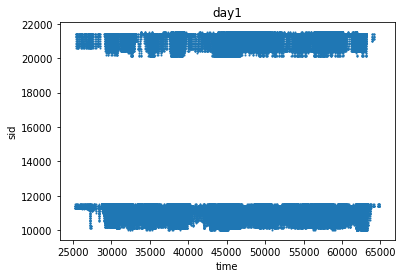

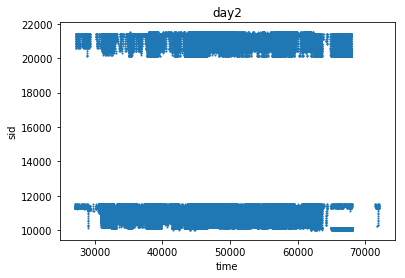

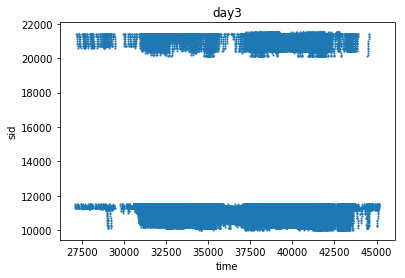

In [96]:
scatter_chart(df_day1, 'time', 'sid', 'day1')
scatter_chart(df_day2, 'time', 'sid', 'day2')
scatter_chart(df_day3, 'time', 'sid', 'day3')